# Practical Statistics for Data Science

In [1]:
import pandas as pd

In [2]:
medal_count = pd.read_excel("data\Medals.xlsx")
medal_count

c:\Users\zik__\OneDrive\Desktop\projects\pratical_statistics\venv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


### Estimates of Location

In [3]:
#Mean
medal_count["Total"].mean()

11.612903225806452

In [4]:
import numpy as np

In [5]:
#Weighted Mean
np.average(medal_count["Total"], weights=medal_count["Gold"])

46.832352941176474

In [6]:
#Trimmed Mean
from scipy.stats import trim_mean

In [7]:
#Trimmed Mean, cutting out the top and the bottom 10%
trim_mean(medal_count["Gold"], 0.1)

1.96

In [8]:
trim_mean(medal_count["Total"], 0.1)

6.8933333333333335

In [9]:
#median
print(medal_count["Gold"].median())
print(medal_count["Total"].median())

1.0
4.0


In [10]:
#weighted median
import wquantiles
wquantiles.median(medal_count["Total"], weights=medal_count['Gold'])

39.400000000000006

In [11]:
#weighted median using pandas
def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() / 2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal_count,"Total", "Gold")

40

In [12]:
#percentile
# q3 meaning above the 3rd quater of the population or 75%, meanining if you have a q3 number of medals 
# you are above of the 75% 
q3 = np.percentile(medal_count["Total"], 75)
q3

11.0

In [13]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


### Estimates of Variability (Dispersion Metrics)

In [15]:
#Variance

from statistics import variance

variance(medal_count["Gold"])

49.315100514259

In [16]:
#Standard deviation

from statistics import stdev

stdev(medal_count["Gold"])

7.022471111671376

In [18]:
#Mean absolute deviation

from numpy import mean, absolute

mean(absolute(medal_count["Gold"] - mean(medal_count["Gold"])))

4.0048560527228565

In [21]:
#Median absolute deviation
from numpy import median, absolute

median(absolute(medal_count["Gold"] - medal_count["Gold"].median()))

1.0

In [24]:
#Interquartile Range
import numpy as np

q3,q1 =  np.percentile(medal_count["Gold"], [75, 25])
iqr = q3 - q1
iqr

3.0

### Exploring Data Distribution



<Axes: >

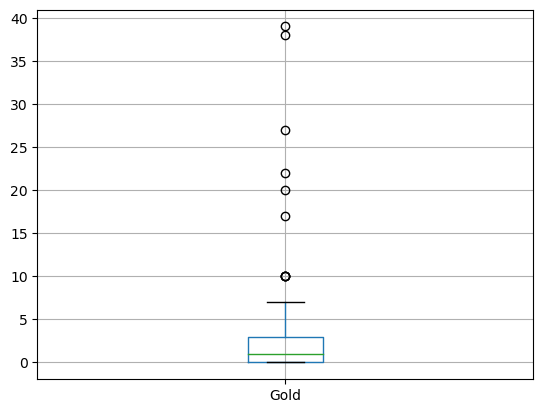

In [27]:
# Percentiles and Boxplots

#BoxPlots
medal_count.boxplot(column="Gold")

In [30]:
# Frequency table and histograms
#frequency table

frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count["Gold"], 10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


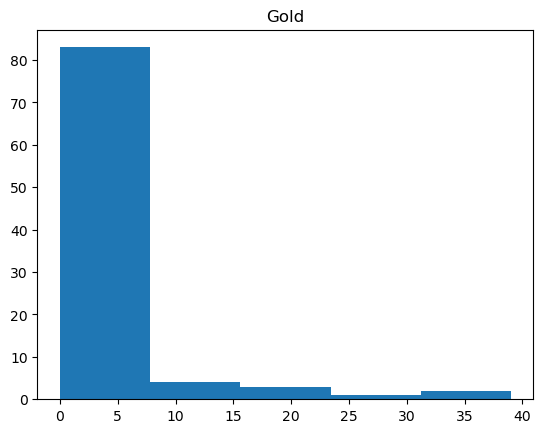

In [42]:
#Histogram 

medal_count.hist(column="Gold",bins=5,grid=False)

plt.show()